# Each sample has a slightly different interface thermal coupling

In [67]:
%pylab notebook

from scipy.optimize import curve_fit

import sys, os, importlib, warnings, pandas as pd, seaborn as sns
warnings.filterwarnings("ignore")

sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation')
import hts_fitting as hts, default_figure_style as dfs, hts_fitfunctions as ff
for lib in [hts, dfs, ff]:
    importlib.reload(lib)


#################################
########## Load data ############
#################################

cols = [0, 1, 9, 10, 12, 13, 14, 19, 23, 25, 27, 29, 39, 41, 43, 45, 52, 53, 54, 55, 56, 57, 58, 59]
names = [
    'tapeid', 
    'anneal',
    'ibeam',
    'ibeam_std',
    'energy', 
    'power', 
    'powerError',
    'ic0',
    'icoff',
    'noff',
    'icon',
    'non',
    
    'tHTS_OFF',
    'tTAR_OFF',
    'tHTS_ON',
    'tTAR_ON',
    
    'tREBCO',
    'degradation',
    'degradationError',
    'suppression', 
    'suppressionError',
    'suppression_corrected',
    'suppressionError_corrected',
    'outlier' 
]
df = pd.read_excel(dfs.master, sheet_name='data', usecols=cols, names=names, skiprows=1)

#################################
########## Filter data ##########
#################################
#cut &= df.installation == 1

cut = df.tTAR_OFF < 20
cut &= (df.suppression != np.nan) & (df.suppression > 0) & (df.suppressionError > 0)
cut &= df.outlier != 1

data = df[cut]

print('\n\nTotal datapoints', data.energy.count())
for tapeid in data.tapeid.unique():
    print('\nDatapoints for', tapeid, data[data.tapeid==tapeid].energy.count())

df.columns

outputDirectory = '../figures/raw/'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Total datapoints 689

Datapoints for f33 68

Datapoints for f20 14

Datapoints for f34 9

Datapoints for f29 304

Datapoints for f23 2

Datapoints for f28 69

Datapoints for f37 223


## Send data to Nico

In [68]:
keep = ['tapeid', 'anneal', 'ibeam', 'ibeam_std', 'energy', 'power', 'powerError', 'tREBCO', 'tHTS_ON', 'tHTS_OFF', 'tTAR_ON', 'tTAR_OFF']
newNames = {
    'tapeid': 'tape',
    'anneal': 'anneal',
    'ibeam': 'ibeam',
    'ibeam_std': 'ibeam_std',
    'energy': 'energy',
    'power': 'power',
    'powerError': 'powerError',
    'tREBCO': 'tREBCO',
    'tHTS_ON': 'tTape_ON',
    'tHTS_OFF': 'tTape_OFF',
    'tTAR_ON': 'tTarget_ON',
    'tTAR_OFF': 'tTarget_OFF'
}
dataForNico = data[(data.tapeid == 'f28')][keep].rename(newNames)
dataForNico.to_excel('../data/fem/modelinput-f28.xlsx')

# With Nico's Thermal Model

<IPython.core.display.Javascript object>


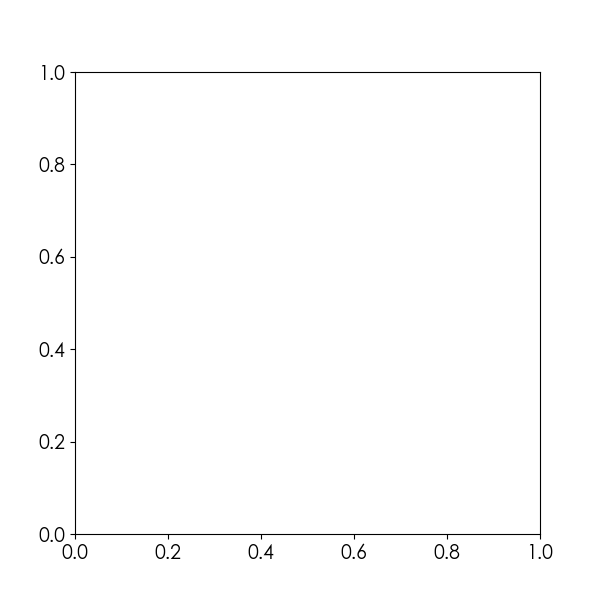

AttributeError: 'DataFrame' object has no attribute 'tapeid'

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
fitfunction = ff.affine

dataf20 = data[(df.tapeid == 'f20') & (data.tREBCO-data.tTAR_ON > 0)]# & (data.energy == 1200)] #& (data.energy == 150)]
dataf29_1 = data[(df.tapeid == 'f29') & (data.tREBCO-data.tTAR_ON > 0) & (data.anneal == 1)]# & (data.energy == 1200)] #& (data.energy == 150)]
dataf29_2 = data[(df.tapeid == 'f29') & (data.tREBCO-data.tTAR_ON > 0) & (data.anneal > 1)]# & (data.energy == 1200)] #& (data.energy == 150)]
dataf33 = data[(df.tapeid == 'f33') & (data.tREBCO-data.tTAR_ON > 0)]# & (data.energy == 1200)] #& (data.energy == 150)]
dataf28 = data[(df.tapeid == 'f28') & (data.tREBCO-data.tTAR_ON > 0)]# & (data.energy == 1200)] #& (data.energy == 150)]
dataf37_1 = data[(df.tapeid == 'f37') & (data.tREBCO-data.tTAR_ON > 0) & (data.anneal == 1)]# & (data.energy == 1200)] #& (data.energy == 150)]
dataf37_2 = data[(df.tapeid == 'f37') & (data.tREBCO-data.tTAR_ON > 0) & (data.anneal > 1)]# & (data.energy == 1200)] #& (data.energy == 150)]

# plot the thermal model envelope
parentDirectory = '../data/fem/latest/Data_txt_Final/'
f20min = pd.read_csv(parentDirectory+'f20/150keV/f20_150keV_deltaT_Apiezon=11um+Sensorpos=4.96mm.txt', names=['ibeam', 'tREBCO'], usecols=[0, 3], delim_whitespace=True, skiprows=5)
f20max = pd.read_csv(parentDirectory+'f20/150keV/f20_150keV_deltaT_Apiezon=15um+Sensorpos=4.96mm.txt', names=['ibeam', 'tREBCO'], usecols=[0, 3], delim_whitespace=True, skiprows=5)

f29min = pd.read_csv(parentDirectory+'f29/150keV/f29_150keV_deltaT_Apiezon=18um+Sensorpos=4.96mm.txt', names=['ibeam', 'tREBCO'], usecols=[0, 3], delim_whitespace=True, skiprows=5)
f29max = pd.read_csv(parentDirectory+'f29/150keV/f29_150keV_deltaT_Apiezon=26um+Sensorpos=4.96mm.txt', names=['ibeam', 'tREBCO'], usecols=[0, 3], delim_whitespace=True, skiprows=5)

f37min = pd.read_csv(parentDirectory+'f37/150keV/f37_150keV_deltaT_Apiezon=5um+Sensorpos=4.96mm.txt', names=['ibeam', 'tREBCO'], usecols=[0, 3], delim_whitespace=True, skiprows=5)
f37max = pd.read_csv(parentDirectory+'f37/150keV/f37_150keV_deltaT_Apiezon=9um+Sensorpos=4.96mm.txt', names=['ibeam', 'tREBCO'], usecols=[0, 3], delim_whitespace=True, skiprows=5)

xsmooth = np.linspace(0, 250, 10000)
datasets = [dataf20, dataf28, dataf29_1, dataf29_2, dataf33, dataf37_1, dataf37_2]
modelmin = [f20min, None, f29min, None, None, f37min, None]
modelmax = [f20max, None, f29max, None, None, f37max, None]
nominalThicknesses = [13, -1, 22, -1, -1, 7, -1]
stdThicknesses = [2, -1, 4, -1, -1, 2, -1]
markers = ['o', 's', '^', '^', 'v', '+', '+']
multipliers = [1, 1, 1, 1.45, 1, 1, 2.16]
label = ''#ffj37'


palette = sns.color_palette("rocket", n_colors=len(datasets))
palette = [palette[0], palette[1], palette[2], palette[2], palette[3], palette[4], palette[4]]
for d, modelmin, modelmax, c, nominalThickness, pmThickness, m, mx in zip(datasets, modelmin, modelmax, palette, nominalThicknesses, stdThicknesses, markers, multipliers):
    #if modelmin is not None:
    #    popt_min, pcov_min = curve_fit(ff.affine, modelmin.ibeam*150/1e3, modelmin.tREBCO)
    #    popt_max, pcov_max = curve_fit(ff.affine, modelmax.ibeam*150/1e3, modelmax.tREBCO)
    #    ax.fill_between(xsmooth, ff.affine(xsmooth, *popt_min), ff.affine(xsmooth, *popt_max), color=c, alpha=.3, label='{:2.0f}'.format(nominalThickness)+' $\pm$ '+'{:1.0f}'.format(pmThickness)+' $\mathrm{\mu}$m')

    x, ex = d.power, d.powerError
    y, ey = d.tREBCO-d.tTAR_ON, np.zeros_like(x)
    #y, ey = d.tREBCO, np.zeros_like(x)
    ax.errorbar(x, y*mx, xerr=ex, yerr=ey, linestyle='None', marker=m, mec=c, mfc='white', color=c)
    ax.fill_between(xsmooth, ff.affine(xsmooth, 0.2), ff.affine(xsmooth, 0.45), color='lightgray', alpha=.3)
    
#ax.text(29.9, 12.8, 'FFJ29', color=palette[1], fontsize=12)
#ax.text(46.4, 13.6, 'FFJ20', color=palette[0], fontsize=12)
#ax.text(46, 6.7, 'FFJ37', color=palette[2], fontsize=12)

ax.set_ylabel('$\Delta$T = T$_\mathrm{REBCO}$ - T$_\mathrm{cold mass}$ [K]')
ax.set_xlabel('Ion Beam Power [mW]')
ax.set_ylim(0, 60)
ax.set_xlim(0, 250)
#ax.legend(title='Model thermal resistance', loc='upper left', alignment='left', frameon=False)
ax.set_title(label)
fig.tight_layout()

ax.set_rasterized(True)
plt.savefig(outputDirectory+'figure06-resistance.svg', format='svg', facecolor='white')

<IPython.core.display.Javascript object>


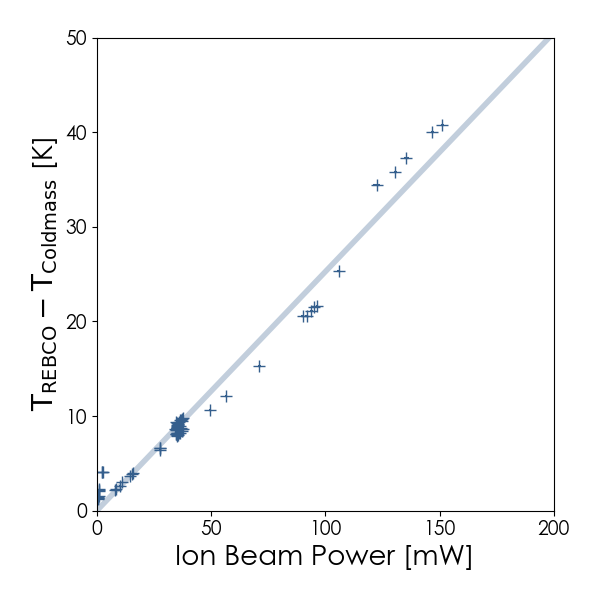

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
fitfunction = ff.affine
xsmooth = np.linspace(0, 300, 1000)

m ='+'

# There are two sets for f29 and f37 because the first anneal changes the thermal coupling (response?) of the tape
alldata = []
allTapes = np.array(['f20', 'f23', 'f28', 'f29', 'f33', 'f34', 'f37'])
palette = sns.color_palette('viridis', 9)
for tape in allTapes:
    d = data[(data.tapeid == tape) & (data.tREBCO-data.tTAR_ON > 0) & (data.anneal == 1)]
    alldata.append(d)
    
    if (tape == 'f29')|(tape == 'f37'):
        d = data[(data.tapeid == tape) & (data.tREBCO-data.tTAR_ON > 0) & (data.anneal > 1)]
        alldata.append(d)

for i, d in enumerate(alldata):
    if d.tapeid.iloc[0] not in ['f20', 'f23', 'f29', 'f33', 'f34', 'f37']:
        x, ex = d.power, d.powerError
        y, ey = d.tREBCO-d.tTAR_ON, np.zeros_like(d.powerError)

        popt, pcov = curve_fit(ff.affine, x, y)

        ax.plot(xsmooth, ff.affine(xsmooth, *popt), color=palette[i], alpha=.3, linewidth=4)
        ax.errorbar(x, y, xerr=ex, linestyle='None', marker=m, markersize=8, color=palette[i])
        

ax.set_xlabel('Ion Beam Power [mW]')
ax.set_ylabel('$\mathrm{T_{REBCO} - T_{Cold mass}}$ [K]')
ax.set_xlim(0, 200)
ax.set_ylim(0, 50)
#ax.set_yticks([0, 3, 6, 9, 12, 15])
fig.tight_layout()
#plt.savefig(outputDirectory+'thermal-resistance.svg', format='svg', facecolor='white')

<IPython.core.display.Javascript object>


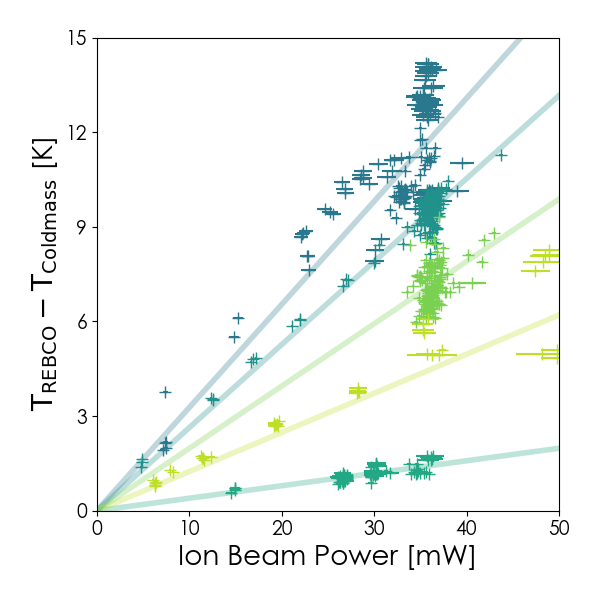

In [114]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
fitfunction = ff.affine
xsmooth = np.linspace(0, 80, 1000)



# There are two sets for f29 and f37 because the first anneal changes the thermal coupling (response?) of the tape
alldata = []
allTapes = np.array(['f20', 'f23', 'f28', 'f29', 'f33', 'f34', 'f37'])
palette = sns.color_palette('viridis', 9)
for tape in allTapes:
    d = data[(data.tapeid == tape) & (data.tREBCO-data.tTAR_ON > 0) & (data.anneal == 1)]
    alldata.append(d)
    
    if (tape == 'f29')|(tape == 'f37'):
        d = data[(data.tapeid == tape) & (data.tREBCO-data.tTAR_ON > 0) & (data.anneal > 1)]
        alldata.append(d)

for i, d in enumerate(alldata):
    if d.tapeid.iloc[0] not in ['f20', 'f23', 'f28', 'f34']:
        x, ex = d.power, d.powerError
        y, ey = d.tREBCO-d.tTAR_ON, np.zeros_like(d.powerError)

        popt, pcov = curve_fit(ff.affine, x, y)

        ax.plot(xsmooth, ff.affine(xsmooth, *popt), color=palette[i], alpha=.3, linewidth=4)
        ax.errorbar(x, y, xerr=ex, linestyle='None', marker=m, markersize=8, color=palette[i])


ax.set_xlabel('Ion Beam Power [mW]')
ax.set_ylabel('$\mathrm{T_{REBCO} - T_{Cold mass}}$ [K]')
ax.set_xlim(0, 50)
ax.set_ylim(0, 15)
ax.set_yticks([0, 3, 6, 9, 12, 15])
fig.tight_layout()
plt.savefig(outputDirectory+'thermal-resistance.svg', format='svg', facecolor='white')

<IPython.core.display.Javascript object>


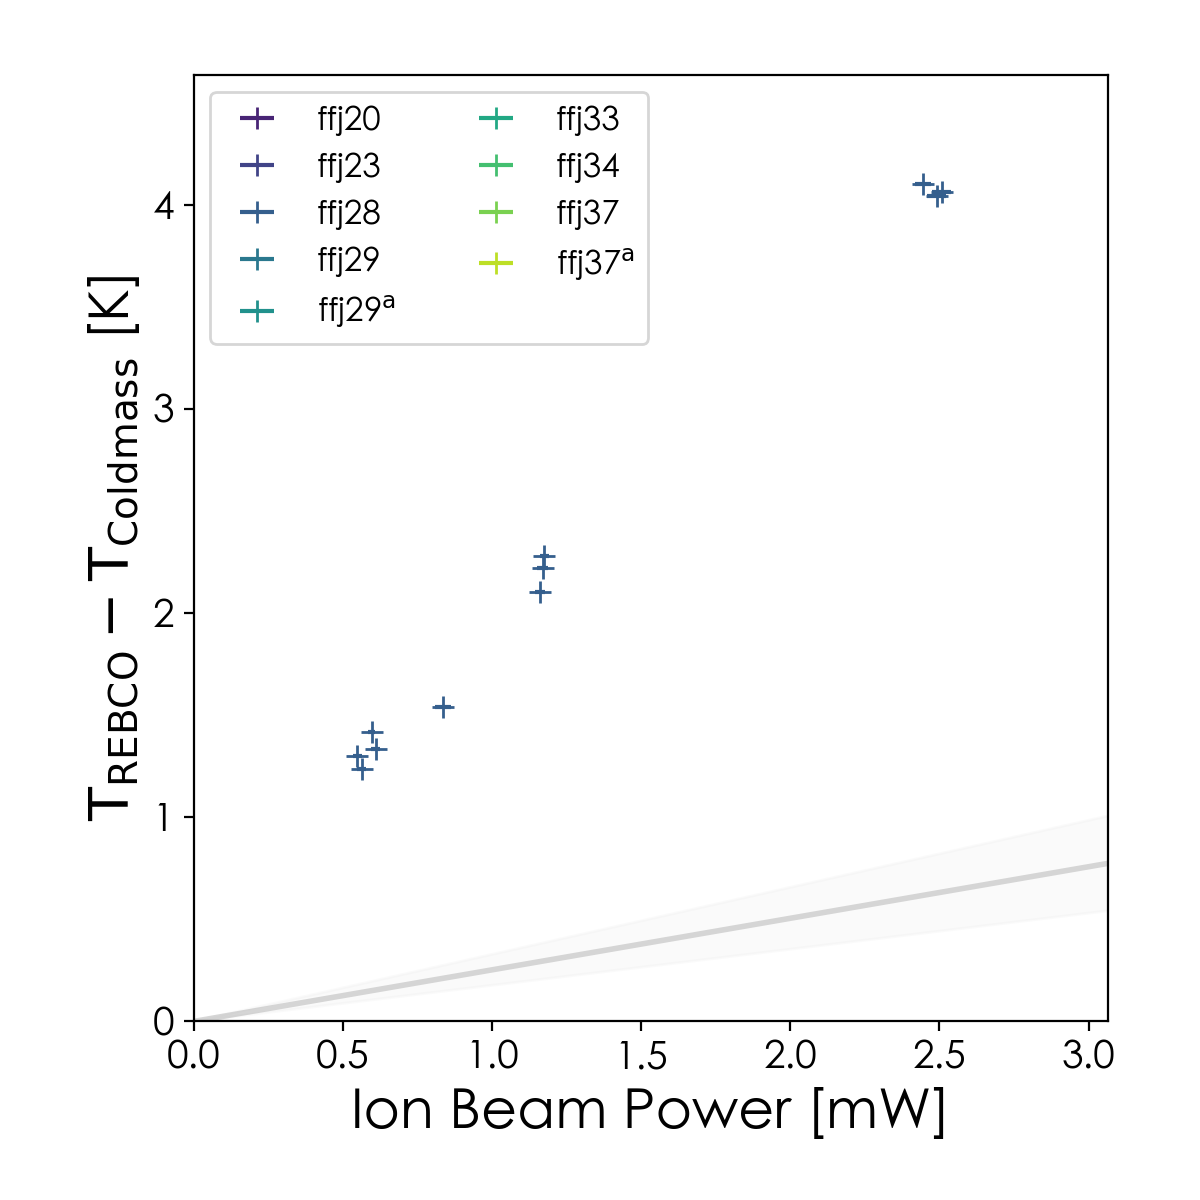

ffj28 thermal resistance 0.2525580531927326


In [70]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
fitfunction = ff.affine
xsmooth = np.linspace(0, 300, 1000)
xx, yy, ii = np.array([]), np.array([]), np.array([])

rho0 = 0.2525580531927326 # interface thermal resistance for ffj28

# There are two sets for f29 and f37 because the first anneal changes the thermal coupling (response?) of the tape
alldata = []
allTapes = np.array(['f20', 'f23', 'f28', 'f29', 'f33', 'f34', 'f37'])
palette = sns.color_palette('viridis', 9)
for tape in allTapes:
    d = data[(data.tapeid == tape) & (data.tREBCO-data.tTAR_ON > 0) & (data.anneal == 1)]
    alldata.append(d)
    
    if (tape == 'f29')|(tape == 'f37'):
        d = data[(data.tapeid == tape) & (data.tREBCO-data.tTAR_ON > 0) & (data.anneal > 1)]
        alldata.append(d)

for i, d in enumerate(alldata):
    tape = d.tapeid.iloc[0]
    x, ex = d.power, d.powerError
    y, ey = d.tREBCO-d.tTAR_ON, np.zeros_like(d.powerError)

    popt, pcov = curve_fit(ff.affine, x, y)
    handles, labels = plt.gca().get_legend_handles_labels()
    label = tape.replace('f', 'ffj')
    if label in labels:
        label += '$\mathrm{^{a}}$'
        
    if tape == 'f28':
        print('ffj28 thermal resistance', popt[0])
        ax.errorbar(x, y, xerr=ex, linestyle='None', marker='+', markersize=8, color=palette[i], label=label)
    else:
        ax.errorbar(x, rho0*y/popt[0], xerr=ex, linestyle='None', marker='+', markersize=8, color=palette[i], label=label)
    xx = np.append(xx, x)
    yy = np.append(yy, rho0*y/popt[0])
    ii = np.append(ii, d.index)
    
popt, pcov = curve_fit(ff.affine, xx, yy)
ax.plot(xsmooth, ff.affine(xsmooth, *popt), linewidth=2, color='gray', alpha=.3)
ax.fill_between(xsmooth, ff.affine(xsmooth, 0.7*popt[0]), ff.affine(xsmooth, 1.3*popt[0]), color='lightgray', alpha=.1)

ax.legend(loc='upper left', ncols=2)
ax.set_xlabel('Ion Beam Power [mW]')
ax.set_ylabel('$\mathrm{T_{REBCO} - T_{Cold mass}}$ [K]')
ax.set_xlim(0, 300)
ax.set_ylim(0, 80)
#ax.set_yticks([0, 3, 6, 9, 12, 15])
fig.tight_layout()
plt.savefig(outputDirectory+'thermal-resistance.svg', format='svg', facecolor='white')

In [43]:

handles.

[<ErrorbarContainer object of 3 artists>,
 <ErrorbarContainer object of 3 artists>,
 <ErrorbarContainer object of 3 artists>,
 <ErrorbarContainer object of 3 artists>,
 <ErrorbarContainer object of 3 artists>,
 <ErrorbarContainer object of 3 artists>,
 <ErrorbarContainer object of 3 artists>,
 <ErrorbarContainer object of 3 artists>,
 <ErrorbarContainer object of 3 artists>]

<IPython.core.display.Javascript object>


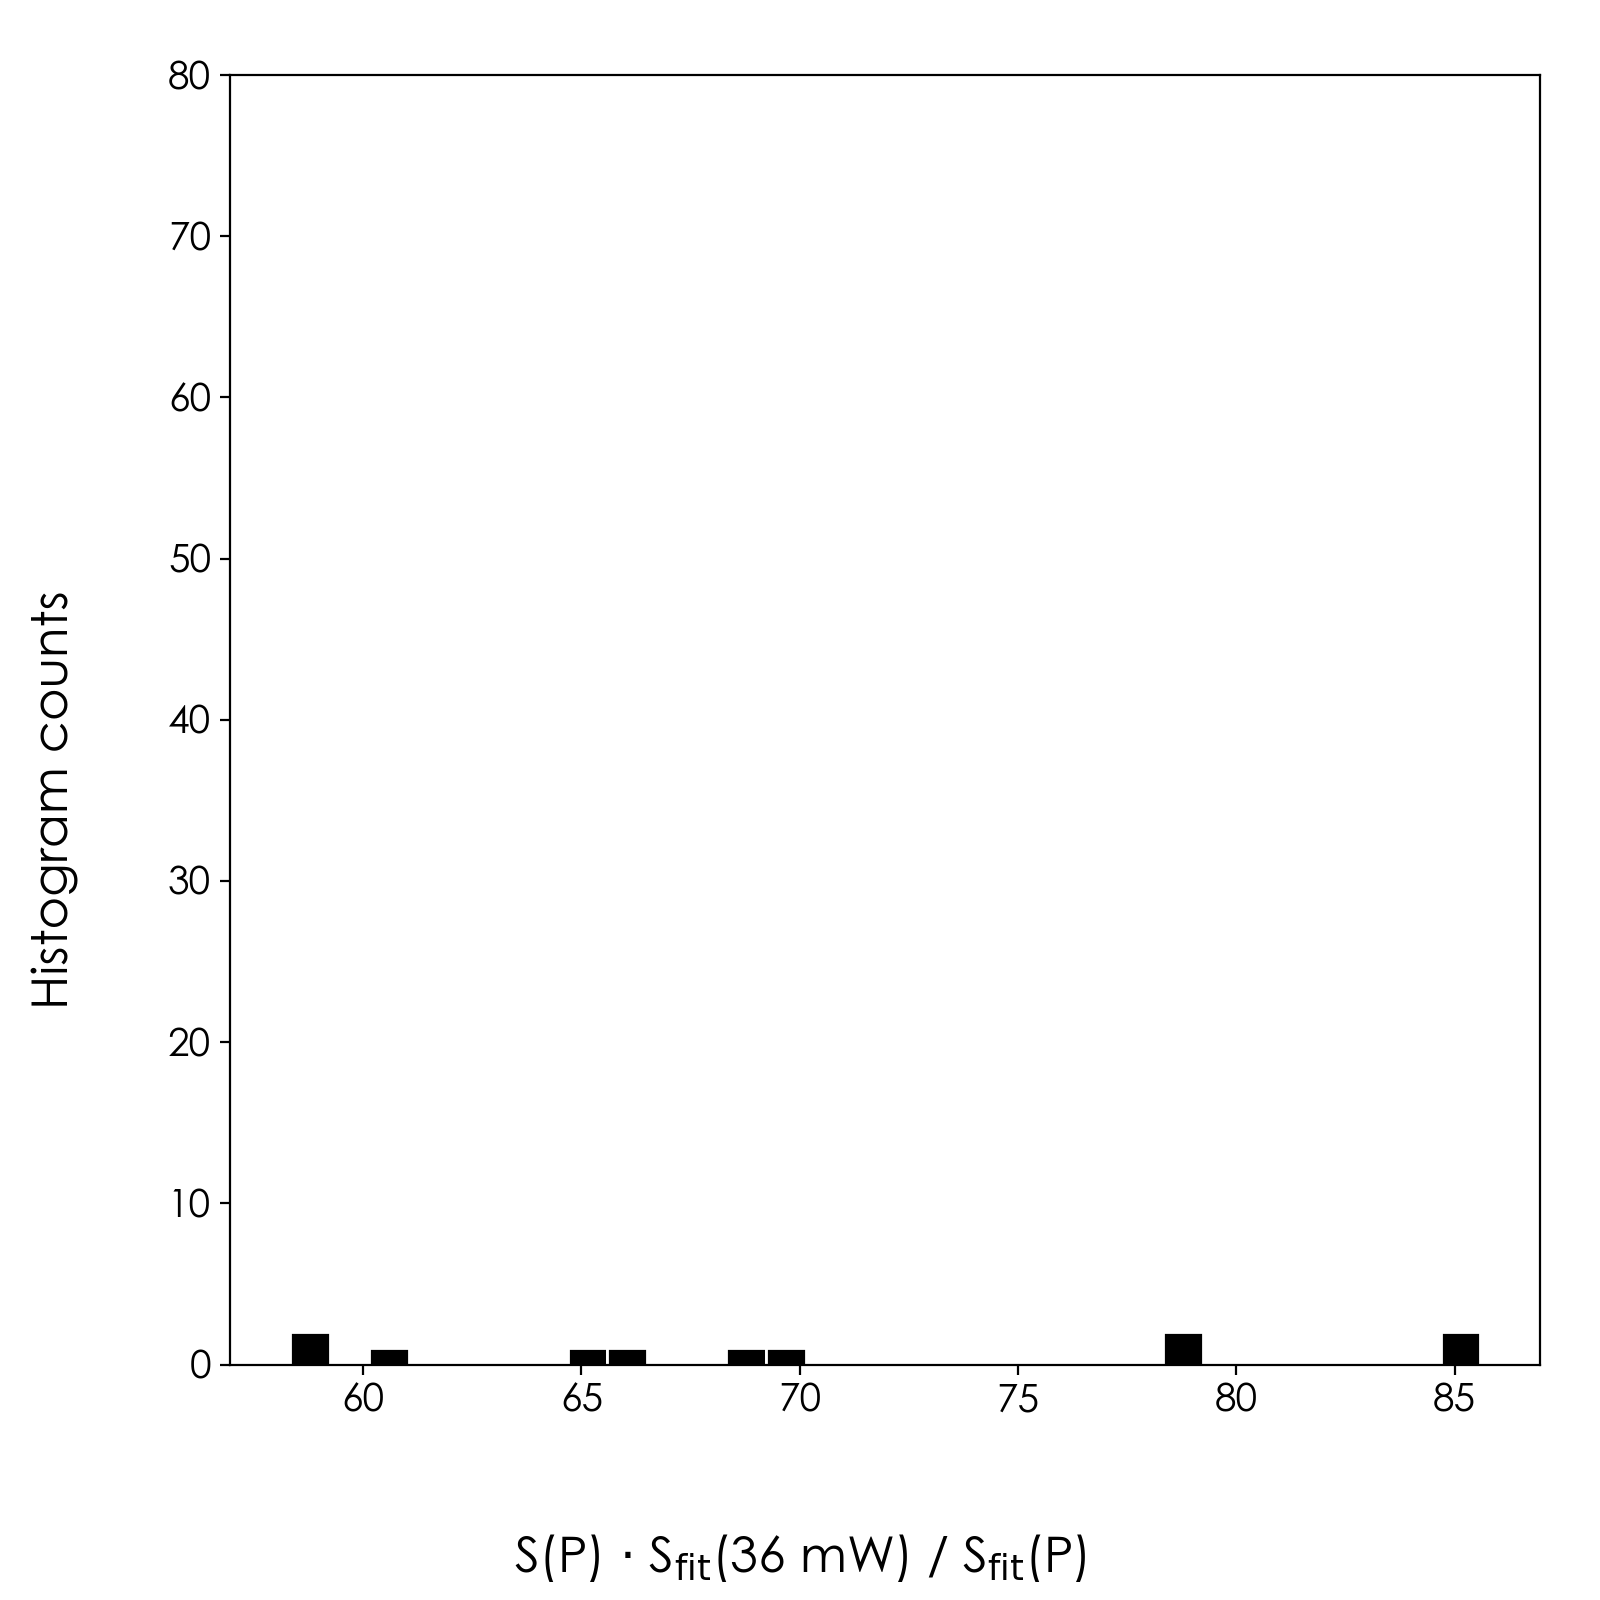

[460. 461. 462. 463. 464. 465. 466. 467. 468. 469. 470.]


In [72]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), sharex=True, sharey=True)
fig.supxlabel('S(P) $\cdot$ S$_\mathrm{fit}$(36 mW) / S$_\mathrm{fit}$(P)', fontsize=18)
fig.supylabel('Histogram counts', fontsize=18)

nbins, density = 30, False
ss = 36*yy/xx

cut =  (ss > 50) #(11 < ss) & (ss < 50)# ss < 50 #
ax.hist(ss[cut], bins=nbins, density=density, edgecolor='white', facecolor='k', label='All energies: {} counts'.format(len(yy)))

#ax.set_xlim(5, 13)
ax.set_ylim(0, 80)

fig.tight_layout()
#plt.savefig('/Users/alexisdevitre/Desktop/snorm.png')
df = pd.DataFrame({'power': xx[cut], 's': yy[cut], 's36': ss[cut]})
df.to_excel(outputDirectory+'histogram.xlsx', index=False)

print(ii[cut])

In [ ]:
Make a histo for different beam powers
Make histos for beam energies
Low beam current points are probably within the resolution of Ic

# What's in the tail of the distribution

### First there are a few points pertaining to the low power range of f28, that produce a very high temperature rise when rescale to 36 mW

<IPython.core.display.Javascript object>


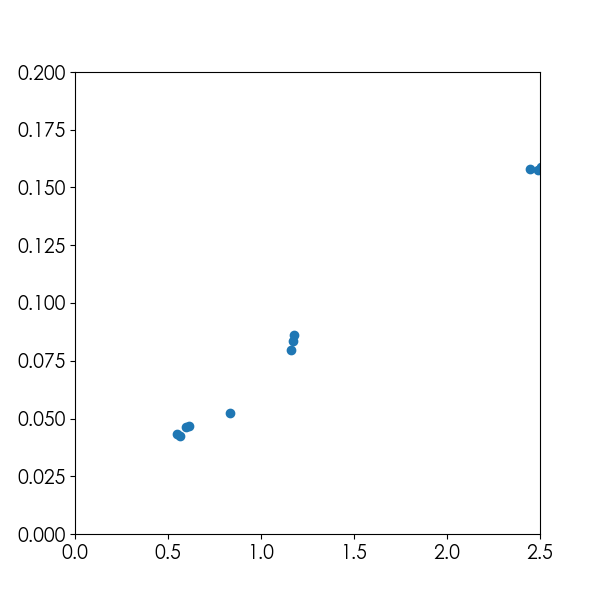

(0.0, 0.2)

In [20]:
highpoints = [460., 461., 462., 463., 464., 465., 466., 467., 468., 469., 470.]
highpoints = pd.read_excel(dfs.master, sheet_name='data', usecols=cols, names=names, skiprows=1).iloc[highpoints]
highpoints

fig, ax = plt.subplots()

x, y = highpoints.power, highpoints.suppression
ax.plot(x, y, marker='o', markersize=6, linestyle='None')

ax.set_xlim(0, 2.5)
ax.set_ylim(0, 0.2)

### Then there are points which don't produce excessively high temperatures but seem to be part of a high temperature tail

In [17]:
hightail = [ 69., 151., 157., 161., 412., 413., 4., 5., 21., 22., 23., 50., 490., 543., 549., 659., 660., 661., 662., 663., 664., 665., 666., 667., 668., 688., 689., 690., 691., 692., 699., 701.]
hightail = pd.read_excel(dfs.master, sheet_name='data', usecols=cols, names=names, skiprows=1).iloc[hightail]
hightail

,tapeid,anneal,energy,power,powerError,ic0,icoff,icon,tTAR_OFF,tTAR_ON,tREBCO,degradation,degradationError,suppression,suppressionError,suppression_corrected,suppressionError_corrected,outlier
69,f20,1,800,24.700000,0.256192,34.175467,32.031980,26.249793,19.14545,19.20847,27.773018,0.937280,7.142760e-08,0.180513,5.493237e-08,0.176658,0,0
151,f29,1,150,35.622827,1.190181,35.103696,35.103696,24.433235,19.62744,19.65845,33.855749,1.000000,7.597168e-08,0.303970,5.412613e-08,0.302962,0,0
157,f29,1,150,15.250197,0.512911,35.103696,35.103696,30.423744,19.62744,19.64807,25.772265,1.000000,7.597168e-08,0.133318,5.648960e-08,0.132840,0,0
161,f29,1,150,7.404721,0.247756,35.103696,35.103696,32.279830,19.62744,19.68140,23.432442,1.000000,7.597168e-08,0.080444,6.036577e-08,0.080149,0,0
412,f29,4,2400,4.861580,0.101947,35.103696,4.175563,3.939347,19.78919,19.76325,21.316901,0.118949,1.561091e-08,0.056571,1.599749e-07,0.031154,0,0
413,f29,4,2400,4.942022,0.095561,35.103696,4.176963,3.928954,19.74246,19.75713,21.383700,0.118989,1.563246e-08,0.059375,1.595247e-07,0.032721,0,0
4,f33,1,150,14.893000,0.497282,33.067613,5.133635,5.022627,19.81361,19.80779,20.543613,0.155247,2.070521e-08,0.021624,1.647072e-07,0.012921,0,0
5,f33,1,150,14.951667,0.504948,33.067613,5.133635,5.041142,19.81361,19.73106,20.452420,0.155247,2.070521e-08,0.018017,1.651212e-07,0.010760,0,0
21,f33,1,150,30.239167,1.008078,33.067613,5.005277,4.748597,19.74654,19.81231,21.291852,0.151365,2.585493e-08,0.051282,1.891465e-07,0.030566,0,0
22,f33,1,150,30.239167,1.008078,33.067613,5.005277,4.751652,19.74654,19.75656,21.276221,0.151365,2.585493e-08,0.050671,1.892378e-07,0.030199,0,0


<IPython.core.display.Javascript object>


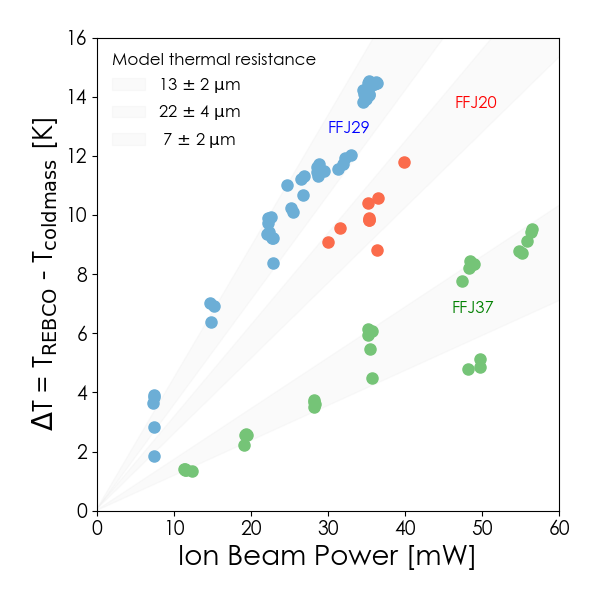

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
fitfunction = ff.affine

dataf20 = data[(df.tapeid == 'f20') & (data.dtOn > 0) & (data.eBeam == 150)]
dataf29 = data[(df.tapeid == 'f29') & (data.dtOn > 0) & (data.eBeam == 150)]
dataf37 = data[(df.tapeid == 'f37') & (data.dtOn > 0) & (data.eBeam == 150)]

# plot the thermal model envelope
parentDirectory = '../data/fem/latest/Data_txt_Final/'
f20min = pd.read_csv(parentDirectory+'f20/150keV/f20_150keV_deltaT_Apiezon=11um+Sensorpos=4.96mm.txt', names=['ibeam', 'tREBCO'], usecols=[0, 3], delim_whitespace=True, skiprows=5)
f20max = pd.read_csv(parentDirectory+'f20/150keV/f20_150keV_deltaT_Apiezon=15um+Sensorpos=4.96mm.txt', names=['ibeam', 'tREBCO'], usecols=[0, 3], delim_whitespace=True, skiprows=5)

f29min = pd.read_csv(parentDirectory+'f29/150keV/f29_150keV_deltaT_Apiezon=18um+Sensorpos=4.96mm.txt', names=['ibeam', 'tREBCO'], usecols=[0, 3], delim_whitespace=True, skiprows=5)
f29max = pd.read_csv(parentDirectory+'f29/150keV/f29_150keV_deltaT_Apiezon=26um+Sensorpos=4.96mm.txt', names=['ibeam', 'tREBCO'], usecols=[0, 3], delim_whitespace=True, skiprows=5)

f37min = pd.read_csv(parentDirectory+'f37/150keV/f37_150keV_deltaT_Apiezon=5um+Sensorpos=4.96mm.txt', names=['ibeam', 'tREBCO'], usecols=[0, 3], delim_whitespace=True, skiprows=5)
f37max = pd.read_csv(parentDirectory+'f37/150keV/f37_150keV_deltaT_Apiezon=9um+Sensorpos=4.96mm.txt', names=['ibeam', 'tREBCO'], usecols=[0, 3], delim_whitespace=True, skiprows=5)

xsmooth = np.linspace(0, 250, 10000)
palette = sns.color_palette("rocket", n_colors=3)
for d, dpalette, modelmin, modelmax, c, nominalThickness, pmThickness in zip([dataf20, dataf29, dataf37], ['Reds_r', 'Blues_r', 'Greens_r'], [f20min, f29min, f37min], [f20max, f29max, f37max], ['r', 'b', 'g'], [13, 22, 7], [2, 4, 2]):
    popt_min, pcov_min = curve_fit(ff.linear, modelmin.ibeam*150/1e3, modelmin.tREBCO)
    popt_max, pcov_max = curve_fit(ff.linear, modelmax.ibeam*150/1e3, modelmax.tREBCO)
    ax.fill_between(xsmooth, ff.linear(xsmooth, *popt_min), ff.linear(xsmooth, *popt_max), color='lightgray', alpha=.1, label='{:2.0f}'.format(nominalThickness)+' $\pm$ '+'{:1.0f}'.format(pmThickness)+' $\mathrm{\mu}$m')
    
    x, ex = d.power, d.powerError
    y, ey = d.dtOn, np.zeros_like(x)
    

    nsegments = 1
    pintervals = np.linspace(0, 1, nsegments)
    for p, c in zip(pintervals, sns.color_palette(dpalette, len(pintervals))):
        cut = (p <= d.degradation) & (d.degradation <= p+1/nsegments)
        ax.plot(x[cut], y[cut], linestyle='None', marker='o', color=c, alpha=1)
    
ax.text(29.9, 12.8, 'FFJ29', color='b', fontsize=12)
ax.text(46.4, 13.6, 'FFJ20', color='r', fontsize=12)
ax.text(46, 6.7, 'FFJ37', color='g', fontsize=12)

ax.set_ylabel('$\Delta$T = T$_\mathrm{REBCO}$ - T$_\mathrm{cold mass}$ [K]')
ax.set_xlabel('Ion Beam Power [mW]')
ax.set_ylim(0, 16)
ax.set_xlim(0, 60)
ax.legend(title='Model thermal resistance', loc='upper left', alignment='left', frameon=False)

fig.tight_layout()

ax.set_rasterized(True)
plt.savefig(outputDirectory+'figure06-resistance.svg', format='svg', facecolor='white')